# Example Script for `plot_helper` Function

## Import

In [11]:
from datetime import datetime as D
from datetime import timedelta as TD

import numpy as np
import matplotlib.dates as mdates

from plot_helper import single_plotter

## Generate Data

In [12]:
random_seed = 42
all_index_range = 220   # * length of demonstration data
time_index = False      # * Whether to use time index or not

x_index = np.array(range(all_index_range))
if time_index:
    x_start = D(year=2000, month=1, day=1, hour=0, minute=0, second=0)
    x_index = np.array([x_start + idx * TD(seconds=5) for idx in x_index])
    x_label = "Day Hour:Minute"
else:
    x_index = np.array(range(all_index_range))
    x_label = "Index"

# * Generate random walk data for plotting.
rng = np.random.default_rng(seed=random_seed)
y1 = np.cumsum(rng.normal(loc=0, scale=1, size=all_index_range))
y2 = np.cumsum(rng.normal(loc=0, scale=1, size=all_index_range))
y3 = 10 + np.cumsum(rng.normal(loc=0, scale=10, size=all_index_range))
y4 = 50 + np.cumsum(rng.normal(loc=0, scale=50, size=all_index_range))
y5 = 0.2 + np.cumsum(rng.normal(loc=0, scale=0.2, size=all_index_range))


## Defining Plot

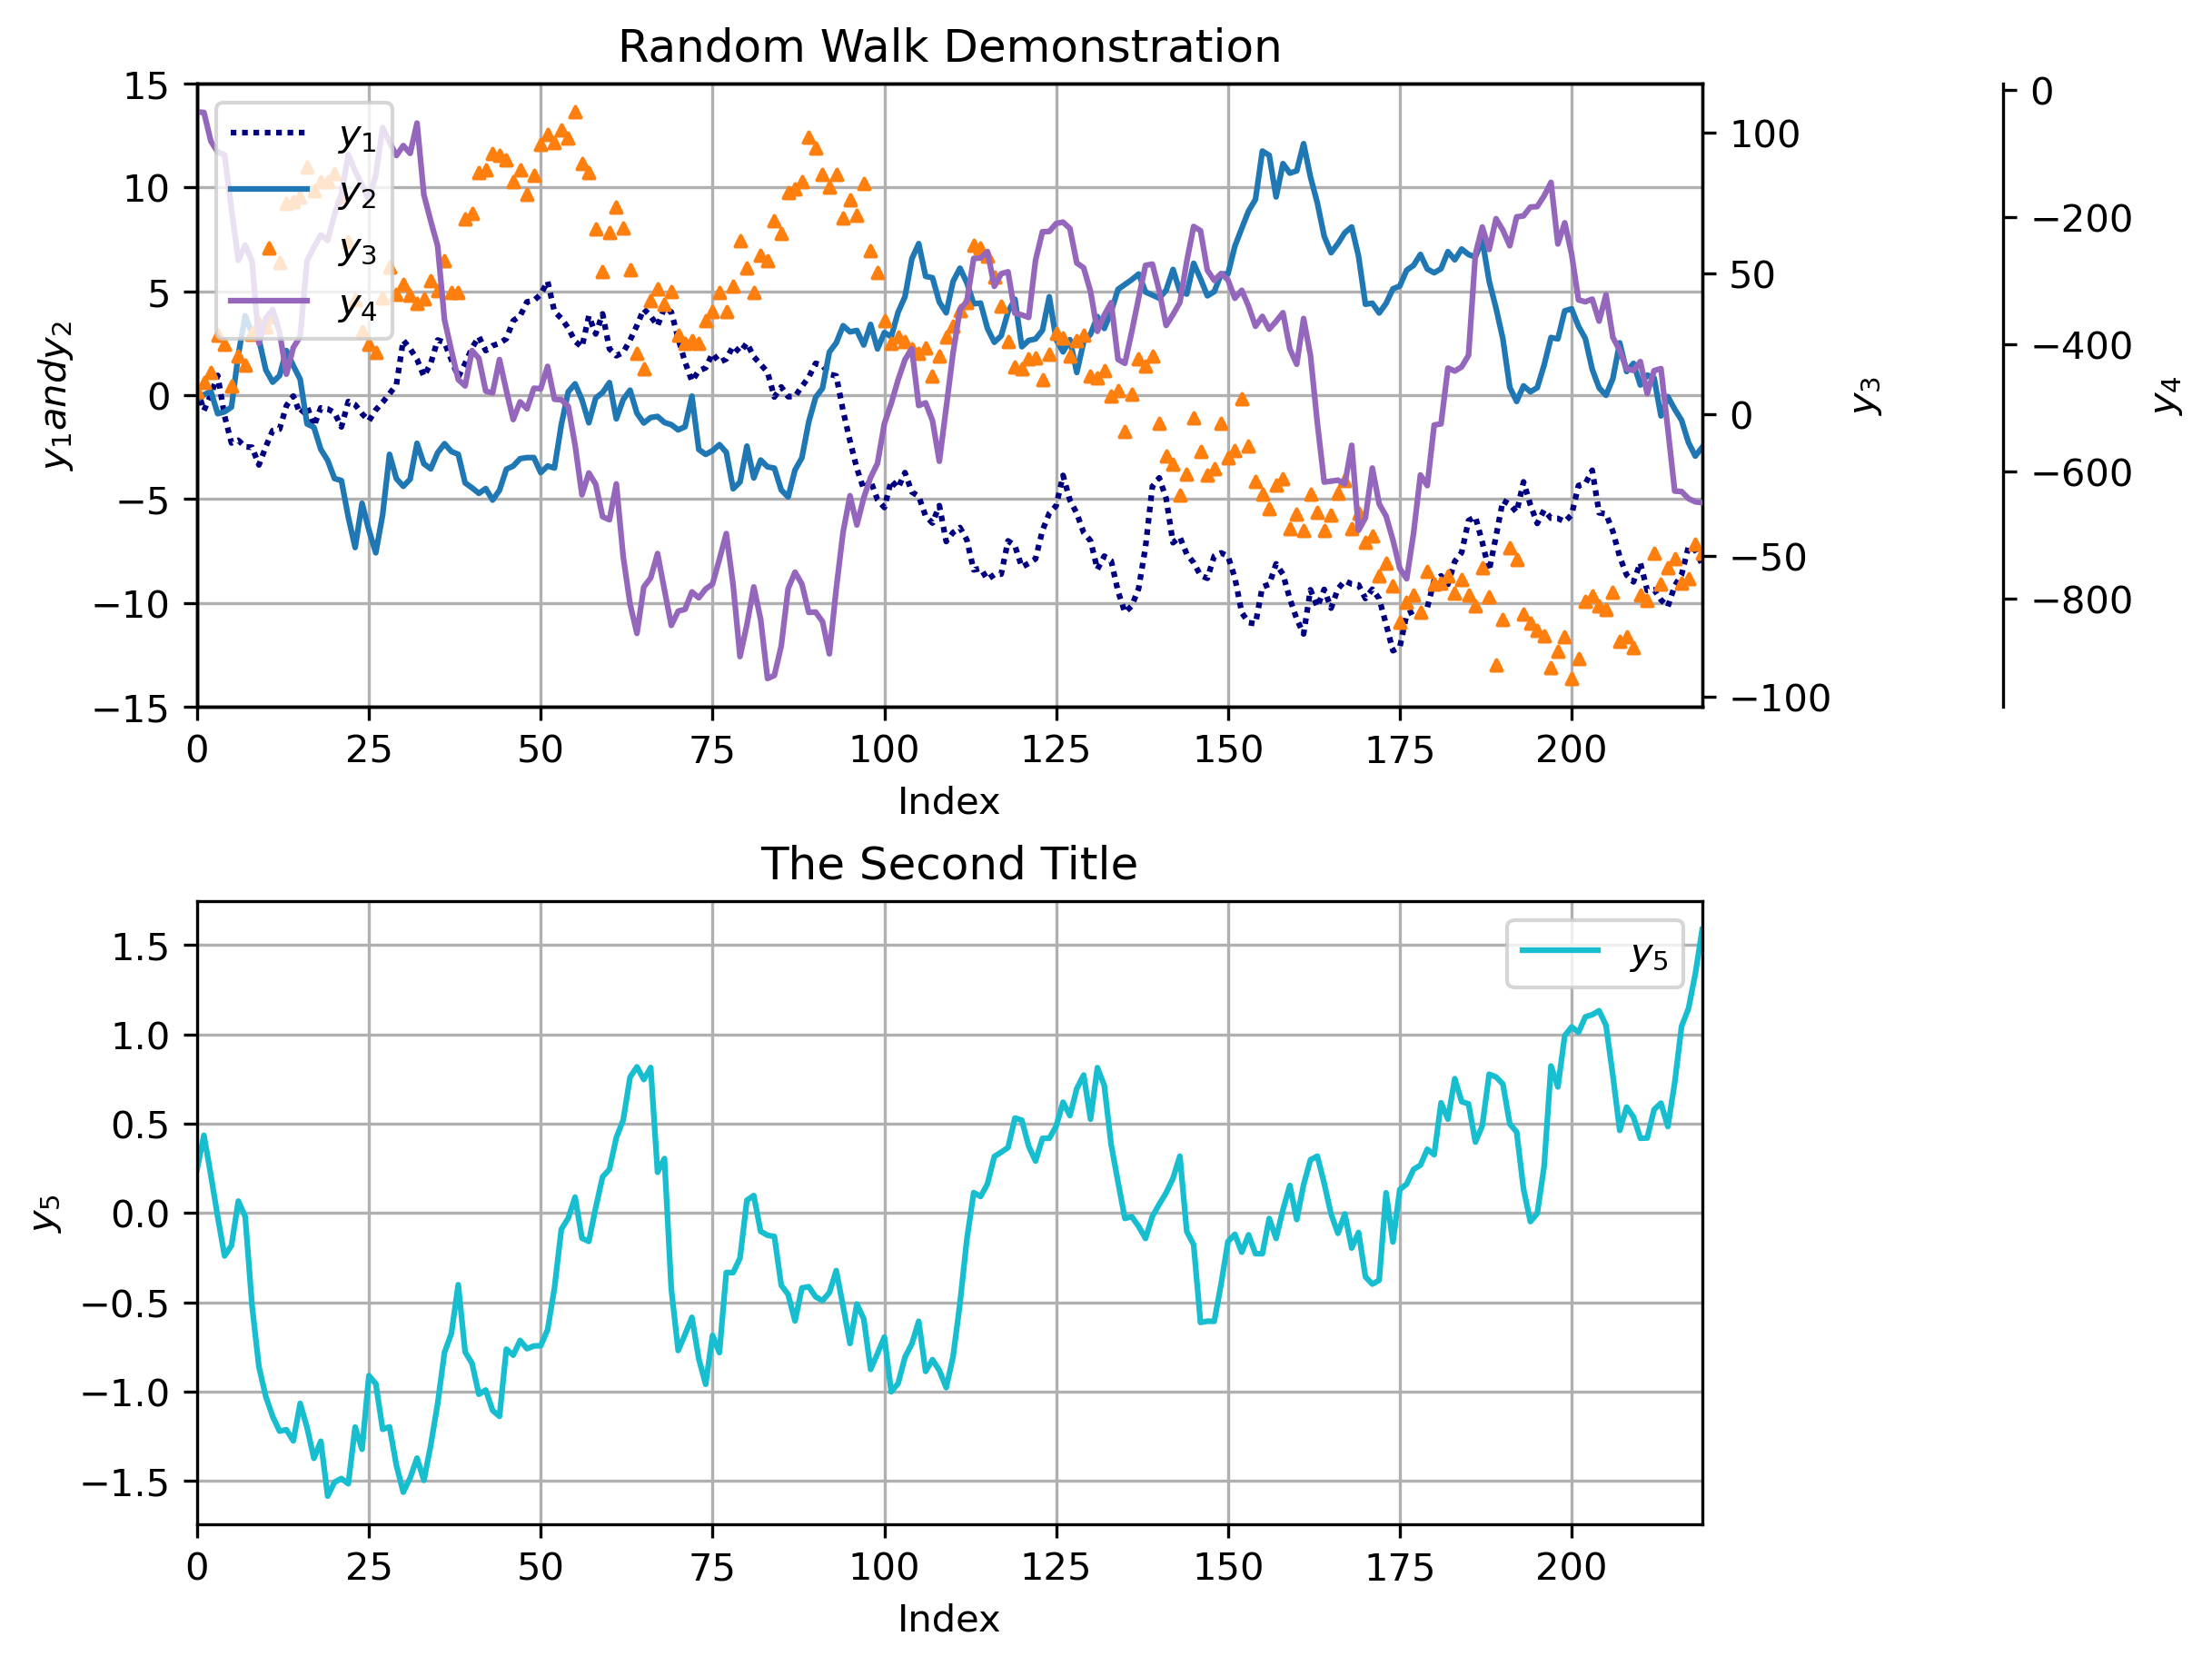

In [13]:
title = f"Random Walk Demonstration"
all_plot_settings_list = [
    {   # * The first subplot of the figure
        # * Title is optional.  
        "title": title, 
        # * xlabel is optional. Same as `matplotlib` attribute.
        "xlabel": x_label,
        # * xlim is optional. One may use array-like or dict to specify
        # * xlim, same as `matplotlib` attribute. Only one setting of x-lim
        # * is available for a single subplot.
        # "xlim": {"bottom": x_index[0]},
        "xlim": np.array([x_index[0], x_index[-1]]),
        "yaxes": [
            # * You may add multiple y-axes for a single subplots. The first
            # * y axis (in this case, the axis of y1 and y2) will be automatically
            # * selected as the main axis of the subplot on the left hand side.
            # * The rest axes (in this case, the axis of y3 and axis of y4) 
            # * will become the minor axes, appearing on the right hand side in
            # * the order as defined in the "yaxes" list.
            {  # & y1 and y2
            # * ylabel is optional. Same as `matplotlib` attribute.
                "ylabel": "$y_{1} and y_{2}$", 
            # * For each y-axis, multiple lines can be attached to by adding
            # * line defining dicts into the "lines" list.  
                "lines": [
                    {
                    # * Two types of lines are supported: scatter and curve.
                    # * The "curve" type will call `matplotlib.pyplot.plot`,
                    # * while the "scatter" type will call 
                    # * `matplotlib.pyplot.scatter`.
                    "type": "curve", 
                    # * Insert your x-axis data under the "x" key and y-axis
                    # * data under the "y" key. These data will be directly
                    # * transferred into the `matplotlib` functions so any
                    # * types of data supported by `matplotlib` are also
                    # * supported here.
                    "x": x_index,   # * "x" is optional
                    "y": y1,        # * "y" is necessary
                    # * Setting terms in "spec" dict will be used to configure
                    # * the line, same keyword arguments as the plot functions
                    # * of `matplotlib`. "spec" is optional.
                    "spec": {"label": "$y_{1}$", "c": "navy", 
                            "linestyle": (0, (1, 1)) # * 'densely dotted'
                            }
                    },
                    {"type": "curve", "x": x_index, "y": y2, 
                    "spec": {"label": "$y_{2}$", "c": "tab:blue",}
                    },
                ],       
            # * "legend" is optional, but if specified, "visible" and "loc" 
            # * keywords are necessary; "loc" keyword can be left as None.
            # * If not specified, a single legend will be automatically
            # * generated for the **whole subplot** instead of multiple legends
            # * for each axis. The specification of the legend for the
            # * **first** y-axis will determine the behavior of legend for the
            # * whole subplot, and the specifications of the rest y-axes will
            # * be **ignored**. To hide the legend, specify the "visible" of
            # * the legend for the first y-axis as False. One may adjust the 
            # * position of legend using "loc" (usage the same as the keyword
            # * in `matplotlib`) or leave it None (`matplotlib` will 
            # * automatically adjust the position of legend).
                "legend": {"visible": True, "loc": "upper left",},
            # * "grid" is optional
            # * One may specify the grid behavior using the "grid" dict. Usage
            # * the same as `grid` attribute in `matplotlib`. 
                "grid": {"which": "both", "axis": "both",},
                # * ylim is optional. One may use list-like or dict to specify
                # * ylim, same as "xlim"
                "ylim": np.array([-15, 15]),
            },
            {  # & y3
                "ylabel": "$y_{3}$", "lines": [
                    {"type": "scatter", "x": x_index, "y": y3,
                    "spec": {"label": "$y_{3}$", "c": "tab:orange", "marker": "^", "s": 8}},
                ],       
            },
            {  # & y4
                "ylabel": "$y_{4}$", "lines": [
                    {"type": "curve", "x": x_index, "y": y4,
                    "spec": {"label": "$y_{4}$", "c": "tab:purple",}},
                ],       
            },
        ]
    },
    {   # * The second subplot of the figure
        # * One may define a separate title for each subplot if needed.
        "title": "The Second Title", "xlabel": x_label, 
        "xlim": np.array([x_index[0], x_index[-1]]), "yaxes": [
            {  # & y5
                "ylabel": "$y_{5}$", "grid": {"which": "both", "axis": "both",},
                "legend": {"visible": True, "loc": None,},
                "lines": [
                    {"type": "curve", "x": x_index, "y": y5,
                    "spec": {"label": "$y_{5}$", "c": "tab:cyan",}},
                ],       
            },
        ]
    },
]
# * Call the single_plotter to generate figure
fig, xaeslist = single_plotter(all_plot_settings_list, figsizeheight=3)
if time_index:
    # * If you want to adjust the x-axes of each subplot, you may use
    # * xaeslist to adjust them.
    for ax in xaeslist:
        # * Here I specify the time format as '%d %H:%M'
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))